In [21]:
import os, shutil, pathlib
import torchvision
import torch
import pandas as pd

from torch import nn
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from datetime import datetime

import numpy as np
import time

import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from PIL import Image


In [3]:
casez = []
casez = np.append(casez,"W15.0")
casez = np.append(casez,"W15.25")
casez = np.append(casez,"W15.5")
casez = np.append(casez,"W15.75")
casez = np.append(casez,"W16.0")
casez = np.append(casez,"W16.2")
casez = np.append(casez,"W16.3")
casez = np.append(casez,"W16.4")
casez = np.append(casez,"W16.5")
casez = np.append(casez,"W16.6")
casez = np.append(casez,"W16.7")
casez = np.append(casez,"W16.8")
casez = np.append(casez,"W17.0")
casez = np.append(casez,"W17.25")
casez = np.append(casez,"W17.5")
casez = np.append(casez,"W17.75")
casez = np.append(casez,"W18.0")

In [4]:
c = []
c = np.append(c,15)
c = np.append(c,15.25)
c = np.append(c,15.5)
c = np.append(c,15.75)
c = np.append(c,16)
c = np.append(c,16.2)
c = np.append(c,16.3)
c = np.append(c,16.4)
c = np.append(c,16.5)
c = np.append(c,16.6)
c = np.append(c,16.7)
c = np.append(c,16.8)
c = np.append(c,17)
c = np.append(c,17.25)
c = np.append(c,17.5)
c = np.append(c,17.75)
c = np.append(c,18)

In [5]:
path = pathlib.Path("/storage/disqs/ML-Anderson3D/Data")
os.chdir(path)
shutil.rmtree(f"{path}/workspace")
os.mkdir(f"{path}/workspace")

for i in range(0,len(casez)):
    src = os.listdir(f"{path}/{casez[i]}")
    for file in src:
        if file.endswith(".jpg"):
            file_name = os.path.join(f"{path}/{casez[i]}", file)
            if os.path.isfile(file_name):
                shutil.copy(file_name, f"{path}/workspace")

In [6]:
shutil.rmtree(f"{path}/labels")
os.mkdir(f"{path}/labels")
for i in range(0,len(casez)):
    csv_input = pd.read_csv(f'{path}/{casez[i]}/labels.csv')
    csv_input.replace(to_replace=0,value=i,inplace = True)
    csv_input.to_csv(f'{path}/labels/labels{c[i]}.csv', index=False)


src = os.listdir(f'{path}/labels')
a = pd.concat([pd.read_csv(f'{path}/labels/{file}') for file in src ], ignore_index=True)
a.to_csv(f'{path}/labels/labels.csv', index=False)


In [7]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path)
        image = np.asarray(image)
        image = np.moveaxis(image, -1, 0)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [25]:
batch_size = 32

data = CustomImageDataset(annotations_file=f"{path}/labels/labels.csv",img_dir=f"{path}/workspace")
print(len(data))
#Create Validation set
from torch.utils.data import random_split
training_data, validation_data, test_data = random_split(data,[320*len(c),60*len(c),20*len(c)])

# Create data loaders.

train_dataloader = DataLoader(training_data, batch_size=batch_size)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

6800


In [26]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(train_features)
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels
print(f"Label: {label}")

Feature batch shape: torch.Size([32, 3, 100, 100])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0

In [27]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model = models.resnet18()
model.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=0, bias=False)
model.fc = nn.Linear(in_features=512,out_features=(len(c)), bias=True)
if torch.cuda.is_available():
    model.cuda()
print(model)

Using cuda device
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)


In [28]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [30]:
epochs = 10
min_valid_loss = np.inf
start = time.time()
tl = np.array([])
vl = np.array([])

for e in range(epochs):
    st = time.time()
    train_loss = 0.0
    model.train()     # Optional when not using Model Specific layer
    for data, labels in train_dataloader:
        data = data.float()
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        target = model(data)
        loss = loss_fn(target,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validation_dataloader:
        data = data.float()
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data)
        loss = loss_fn(target,labels)
        valid_loss = loss.item() * data.size(0)
    
    et = time.time()
    rt = et-st

    print(f'Epoch {e+1} \t Runtime: {round(rt,2)}s \t Training Loss: {train_loss / len(train_dataloader)} \t Validation Loss: {valid_loss / len(validation_dataloader)}')
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Saving State Dict
        torch.save(model.state_dict(), 'saved_model.pth')
    else:
      print(" ")
    
    tl = np.append(tl, train_loss / len(train_dataloader))
    vl = np.append(vl,valid_loss / len(validation_dataloader))

end = time.time()
total = end-start
print(f"Total runtime: {round(total,2)}s")

Epoch 1 	 Runtime: 19.52s 	 Training Loss: 2.862275791168213 	 Validation Loss: 2.4650107324123383
Validation Loss Decreased(inf--->78.880343) 	 Saving The Model
Epoch 2 	 Runtime: 19.82s 	 Training Loss: 2.8245709517422846 	 Validation Loss: 2.459673911333084
Validation Loss Decreased(78.880343--->78.709565) 	 Saving The Model
Epoch 3 	 Runtime: 19.83s 	 Training Loss: 2.8051252982195685 	 Validation Loss: 2.453853517770767
Validation Loss Decreased(78.709565--->78.523313) 	 Saving The Model
Epoch 4 	 Runtime: 19.94s 	 Training Loss: 2.7867092595380893 	 Validation Loss: 2.448232352733612
Validation Loss Decreased(78.523313--->78.343435) 	 Saving The Model
Epoch 5 	 Runtime: 20.68s 	 Training Loss: 2.768707003312952 	 Validation Loss: 2.4424102902412415
Validation Loss Decreased(78.343435--->78.157129) 	 Saving The Model
Epoch 6 	 Runtime: 22.95s 	 Training Loss: 2.750780494072858 	 Validation Loss: 2.436170369386673
Validation Loss Decreased(78.157129--->77.957452) 	 Saving The Model

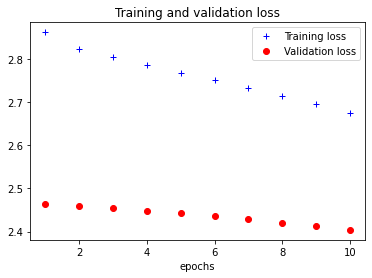

In [31]:
x = np.arange(0,epochs,1)
plt.plot(x+1, tl, "b+", label="Training loss")
np.savetxt(f"csv/tl-C{len(c)}-N400-{datetime.now()}.csv", tl, delimiter=",")
plt.plot(x+1, vl, "ro", label="Validation loss")
np.savetxt(f"csv/vl-C{len(c)}-N400-{datetime.now()}.csv", vl, delimiter=",")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [32]:

predict = []
p = []
device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
for i in range(0,20*len(c)):
    x, y = test_data[i][0], test_data[i][1]
    x = x.reshape(1,3,100,100)
    x = torch.from_numpy(x)
    x = x.float()
    with torch.no_grad():
        pred = model(x.cuda()) if torch.cuda.is_available() else model(x)
        predicted, actual = pred[0].argmax(0), y 
        predicted = torch.Tensor.cpu(predicted)
        predict = np.append(predict, predicted)
        p = np.append(p, actual)


In [33]:
cm = confusion_matrix(p, predict)
print(cm)
np.savetxt(f"csv/cm-C{len(c)}-N400-{datetime.now()}.csv", cm, delimiter=",")
score = round(accuracy_score(p, predict)*100,2)
print(f"Model Accuracy: {score}%")

[[ 5  8  4  1  0  0  2  2  0  0  1  0  4  0  0  1  0]
 [ 4  3  0  1  0  0  0  2  0  1  0  0  1  0  1  0  0]
 [ 4  3  4  0  0  2  0  0  0  1  0  0  2  0  0  0  0]
 [ 6  3  0  3  0  3  0  0  0  1  0  0  1  0  0  1  0]
 [ 3  4  0  0  1  3  0  0  0  0  1  0  0  0  1  0  0]
 [ 3  6  3  0  0  1  0  0  0  1  2  0  1  0  2  2  0]
 [ 2  2  1  0  0  1  0  0  0  0  1  1  2  0  1  6  1]
 [ 3  0  5  0  0  0  1  0  0  0  0  0  2  1  1  2  1]
 [ 4  2  5  1  0  2  2  0  0  0  1  0  1  0  0  3  0]
 [ 1  4  1  2  1  0  2  0  0  2  3  0  1  0  0  2  2]
 [ 5  4  6  0  0  3  0  0  0  0  2  0  1  0  2  3  0]
 [ 2  3  3  0  1  2  0  0  0  1  0  0  4  0  1  3  2]
 [ 1  0  0  1  0  0  2  0  0  0  3  0  4  0  2  2  1]
 [ 0  1  3  1  0  2  0  0  0  0  0  1  5  0  0  8  0]
 [ 0  0  1  2  0  1  0  0  0  1  1  0  3  0  2  6  3]
 [ 1  0  0  0  0  1  0  0  0  0  3  0  6  0  5 11  1]
 [ 0  0  2  0  1  3  0  0  0  0  0  0  2  0  0 13  1]]
Model Accuracy: 11.47%
